In [1]:
%matplotlib inline  
import pdb
import random
import pylab as pl
from scipy.optimize import fmin_bfgs
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [17]:
def designMatrix(X, order):
    N = len(X)
    phi = np.array([[0.]*order]*N)
    for i in range(N):
        for j in range(order):
            phi[i,j] = X[i]**j
    return phi

In [18]:
def regressionFit(X, Y, phi):
    phiT = np.transpose(phi)
    a = np.dot(phiT,Y)
    phiInv = inv(np.dot(phiT,phi))
    w = np.dot(phiInv,a)
    return w

In [145]:
# X is an array of N data points (one dimensional for now), that is, NX1
# Y is a Nx1 column vector of data values
# order is the order of the highest order polynomial in the basis functions
def regressionPlot(X, Y, order):
    # constuct the design matrix (Bishop 3.16), the 0th column is just 1s.
    phi = designMatrix(X, order+1)
    # print phi
    # compute the weight vector
    w = regressionFit(X, Y, phi)
    print 'w', w
    print 'error', sse(X, Y, order, w)
    # produce a plot of the values of the function 
    pts = np.linspace(min(X), max(X), 100)
    Yp = np.dot(designMatrix(pts, order+1), w)
    pl.plot(pts, Yp)

w [  0.33961683   6.07576879 -10.54549191 -22.73941107  44.32688711
 -17.21940111]
error 0.34239152748


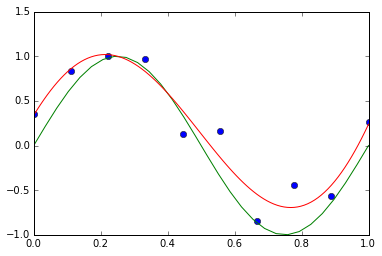

In [146]:
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]

plt.plot(X,Y, marker = "o", linestyle = "None")
plt.plot(np.linspace(0,1,30), np.sin(2*np.pi*np.linspace(0,1,30)))
regressionPlot(X,Y,5)
plt.show()


In [55]:
def polyPredict(X, M, w):
    N = len(X)
    Ypred = np.array([0.]*N)
    for i in range(N):
        for j in range(M+1):
            Ypred[i] += w[j]*X[i]**j
    return Ypred

In [56]:
def sse(X, Y, M, w):
    Ypred = polyPredict(X, M, w)
    sse = 0
    for i in range(len(Ypred)):
        sse += (Ypred[i] - Y[i])**2
    return sse

In [66]:
def sseGrad(X, Y, M, w):
    ret = np.array([0.]*(M+1))
    Ypred = polyPredict(X, M, w)
    for j in range(M+1):
        ret[j]= 0
        for i in range(len(Y)):
            ret[j] -= 2*X[i]**j * (Y[i] - Ypred[i])
    return(ret)

In [71]:
def derivative(f, x, var, epsilon):
    y = np.copy(x)
    y[var] += epsilon
    return ((f(y) - f(x))/epsilon)
def gradient(f,x,epsilon):
    grad = np.array([0.]*len(x))
    for i in range(len(x)):
        grad[i] = derivative(f, x, i, epsilon)
    return grad

In [76]:
M=3
w = [2.]*(M+1)
X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
sseG = sseGrad(X, Y, M, w)
sseG

array([ 81.45920259,  55.25277795,  43.88730298,  37.02178145])

In [140]:
def f(w):
    M=5
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sse(X, Y, M, w)
def gradf(w):
    M=5
    X = [0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000]
    Y = [0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502]
    return sseGrad(X, Y, M, w)

In [77]:
w = [2.]*(M+1)
numSseGrad = gradient(f, w, 0.01)
numSseGrad

array([ 81.55920259,  55.28796314,  43.9106729 ,  37.04019187])

In [141]:
def gradientDescent(f, gradf, x_ini, step, stop, iterMax):
    x1 = np.copy(x_ini)
    y1 = f(x1)
    y0 = f(x1) + stop + 1
    nbIter = 0
    hist = [np.append(x1,y1)]
    while (abs(y1 - y0) >= stop) & (nbIter <= iterMax):
        nbIter += 1
        grad = gradf(x1)
        x0 = np.copy(x1)
        x1 = np.copy(x0) - step*grad
        y0 = f(x0)
        y1 = f(x1)
        hist = np.append(hist, [np.append(x1,y1)], axis = 0)
    return(hist)

In [147]:
M = 5
#w = [0., 8., -25., 17]
w = [1., 1., 1., 1., 1., 1.]
hist = gradientDescent(f, gradf, w, 0.04, 10**(-7), 30000)
print len(hist)
for x in hist[0:-1:500]:
    print [round(i,4) for i in x]
hist[-1, 0:M+1] - [ 0.31370273,  7.98537103, -25.42610224, 17.37407653]

30002
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 95.3026]
[0.8539, -0.0826, -2.8045, -1.3194, 0.782, 2.6613, 0.9804]
[0.7319, 1.0959, -4.2134, -2.1979, 0.9549, 3.7949, 0.7035]
[0.6481, 1.9123, -5.2137, -2.7716, 1.1001, 4.5426, 0.5728]
[0.5903, 2.4806, -5.9341, -3.137, 1.2263, 5.0268, 0.5107]
[0.5504, 2.8791, -6.4627, -3.3601, 1.3392, 5.3307, 0.4806]
[0.5227, 3.1613, -6.8598, -3.486, 1.4428, 5.5116, 0.4656]
[0.5034, 3.3639, -7.1666, -3.5457, 1.5399, 5.6086, 0.4576]
[0.4898, 3.512, -7.4114, -3.5603, 1.6322, 5.6483, 0.453]
[0.4802, 3.6226, -7.6134, -3.5443, 1.7211, 5.649, 0.4499]
[0.4732, 3.7076, -7.7858, -3.5076, 1.8074, 5.6233, 0.4476]
[0.4681, 3.7749, -7.9377, -3.4568, 1.8918, 5.5798, 0.4456]
[0.4643, 3.8301, -8.0753, -3.3968, 1.9747, 5.5242, 0.4438]
[0.4613, 3.8769, -8.2028, -3.3305, 2.0563, 5.4606, 0.4422]
[0.4589, 3.9179, -8.3232, -3.2603, 2.1368, 5.3918, 0.4405]
[0.4569, 3.9548, -8.4384, -3.1875, 2.2164, 5.3196, 0.439]
[0.4552, 3.9889, -8.5497, -3.1131, 2.2952, 5.2452, 0.4374]
[0.4537, 4.0209,

ValueError: operands could not be broadcast together with shapes (6,) (4,) 

In [ ]:
def bishopCurveData():
    # y = sin(2 pi x) + N(0,0.3),
    return getData('curvefitting.txt')

def regressTrainData():
    return getData('regress_train.txt')

def regressValidateData():
    return getData('regress_validate.txt')